In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../examples/outputs/CA_cd_2020_map/3654992_CA_cd_2020_map_with_20_sims.csv")

In [3]:
df

,Unnamed: 0,draw,district,total_pop,b1_probs,b2_wgt,parent
0,1,1,1,761248,0.057151,0.014286,1
1,2,1,2,759317,0.042847,0.006536,5
2,3,1,3,763471,0.054903,0.012987,3
3,4,1,4,764039,0.045513,0.009901,13
4,5,1,5,763383,0.052354,0.014286,4
...,...,...,...,...,...,...,...
1035,1036,20,48,760929,0.084766,0.142857,7
1036,1037,20,49,759217,0.030855,0.033333,1
1037,1038,20,50,756683,0.038986,0.018868,11
1038,1039,20,51,757202,0.076325,0.142857,9


In [4]:
n_simulations = df["draw"].max() 
n_districts = df["district"].max()

graph = nx.grid_2d_graph(n_simulations, n_districts)
graph.remove_edges_from(graph.edges())
 
 
for i in range(1,n_districts):
    ancestor_vector = df[df["district"] == i+1]["parent"] - 1
    for old, new in enumerate(ancestor_vector):
        graph.add_edge((new, n_districts-i), (old, n_districts-i-1))
    
    
    

In [5]:
graph2 = nx.Graph()
graph2.add_nodes_from(graph.nodes())

bottom_row = [(i,0) for i in range(n_simulations)]

for node in bottom_row:
    curr_node = node
    while curr_node[1] != n_districts - 1:
        for edge in graph.edges(curr_node):
            if edge[1][1] == curr_node[1] + 1:
                graph2.add_edge(edge[0], edge[1])
                curr_node = edge[1]

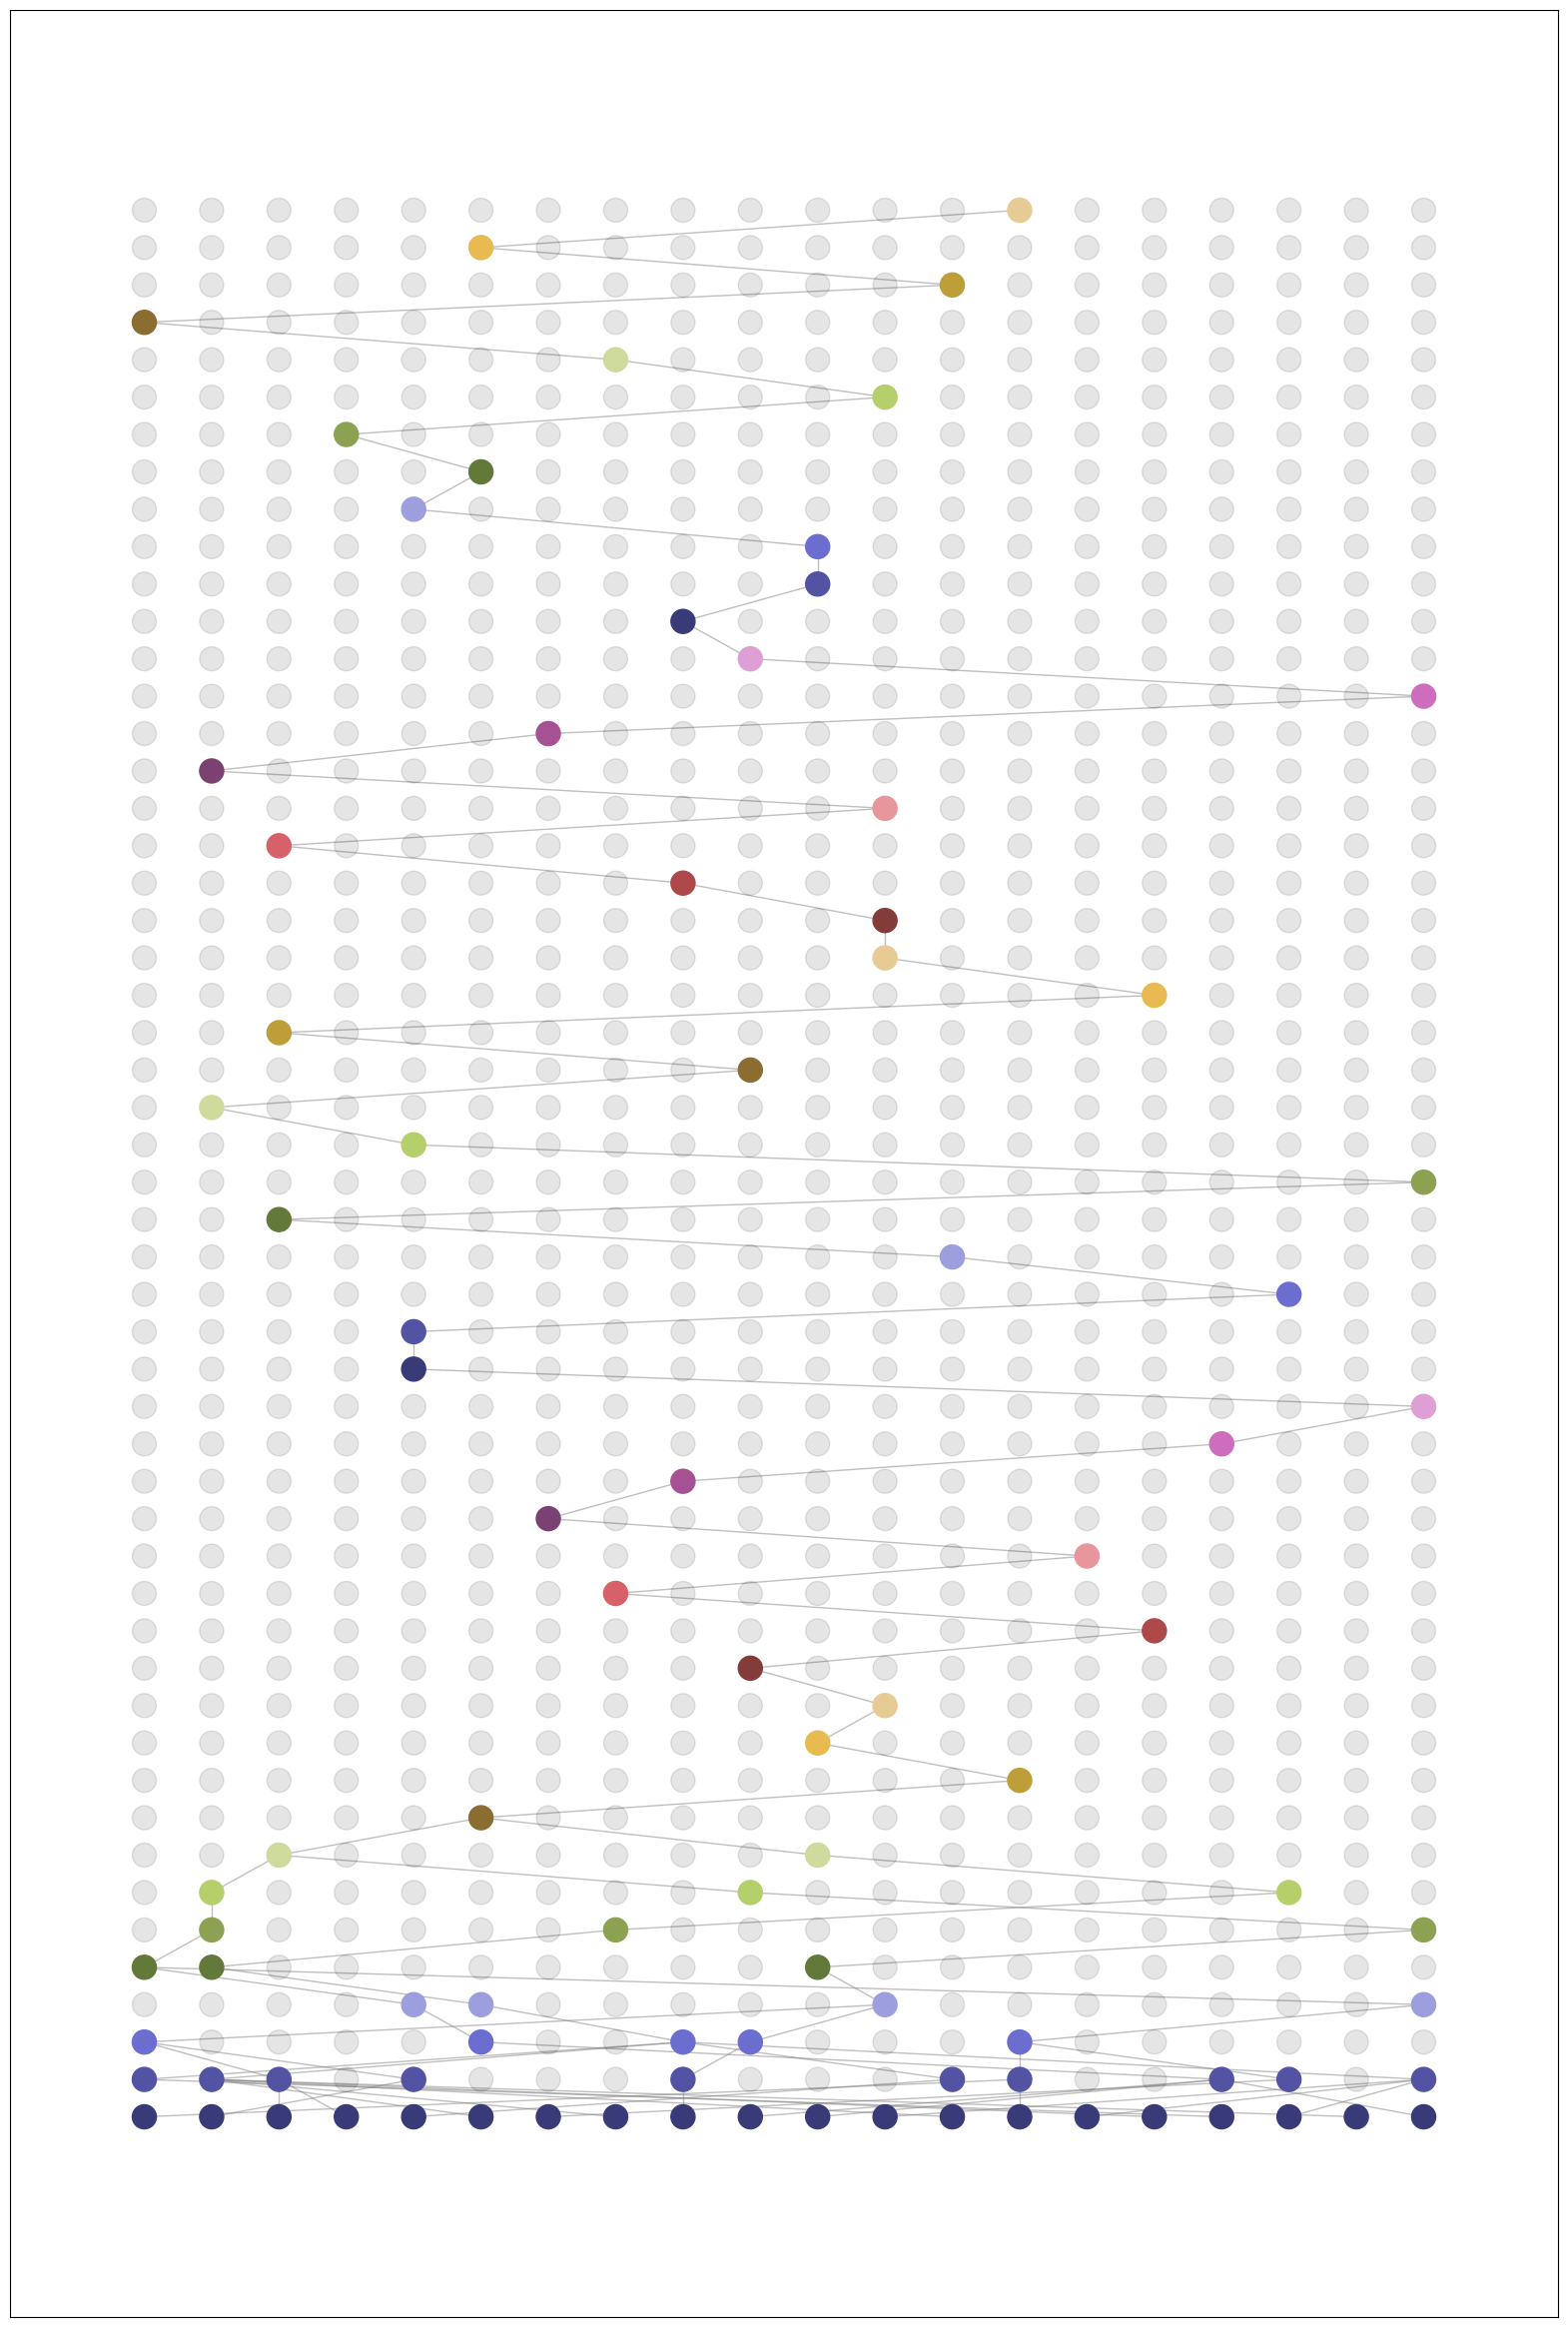

In [8]:
pos = {node:node for node in graph2.nodes()}
labels = {node:node[0]+1 for node in graph2.nodes()}

# Generate color map
color_map = mp.colormaps['tab20b'] 
colors = [color_map(node[1] % 20) if graph2.degree(node) > 0 else (0.0,0.0,0.0,0.1) for node in graph2.nodes()]

plt.figure(figsize=(20,30))
nx.draw_networkx_nodes(graph2,pos=pos, node_color=colors)
# nx.draw_networkx_labels(graph2, pos=pos, labels=labels)
nx.draw_networkx_edges(graph2, pos=pos, edge_color="gray", alpha=0.5)
# plt.savefig(f"ancestry_graph_{n_simulations}_CA.pdf")